In [35]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
mean_1=np.array([0.0,0.0])
cov_1=np.array([[1.0,0.1],[0.1,1.1]])
mean_2=np.array([6.0,6.0])
cov_2=np.array([[1.3,0.2],[0.2,1.5]])
mean_3=np.array([12.0,12.0])
cov_3=np.array([[1.0,0.1],[0.1,1.1]])
dist_01=np.random.multivariate_normal(mean_1,cov_1,500)
dist_02=np.random.multivariate_normal(mean_2,cov_2,500)
dist_03=np.random.multivariate_normal(mean_3,cov_3,500)
dist_01[:4,:]

array([[-0.01521544, -0.57639742],
       [-0.63010825,  0.36353428],
       [-1.14175889,  0.91701521],
       [-2.06195643,  0.21891563]])

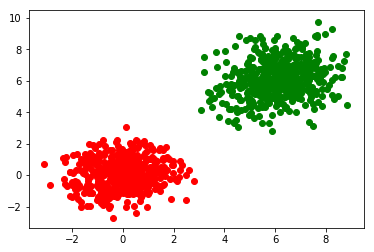

In [37]:
plt.scatter(dist_01[:,0],dist_01[:,1],c='red')
plt.scatter(dist_02[:,0],dist_02[:,1],c='green')
#for i in dist_03:
 #   plt.scatter(i[0],i[1],color='blue')


In [38]:
data=np.vstack((dist_01,dist_02))
data[:10,:]
np.random.shuffle(data)

In [39]:
k=4
num_iters=5
clusters={}
colors=['red','green','blue','yellow']
for cx in range(k):
    cluster_vals={
        'centroid':np.random.uniform(low=data.min(),high=data.max(),size=(data.shape[1])),
        'points':[],
        'color':colors[cx],
        'history':[]
    }
    clusters[cx]=cluster_vals

In [40]:
def Distance(p1,p2):
    res=np.sqrt(((p1-p2)**2).sum())
    return res
Distance(np.array([1,1,1]),np.array([0,0,0]))

1.7320508075688772

In [41]:
clusters

{0: {'centroid': array([-2.14013991, -0.37206762]),
  'points': [],
  'color': 'red',
  'history': []},
 1: {'centroid': array([ 8.54986793,  0.25302089]),
  'points': [],
  'color': 'green',
  'history': []},
 2: {'centroid': array([ 7.7092388 ,  5.44059153]),
  'points': [],
  'color': 'blue',
  'history': []},
 3: {'centroid': array([ 5.14563622,  9.5223914 ]),
  'points': [],
  'color': 'yellow',
  'history': []}}

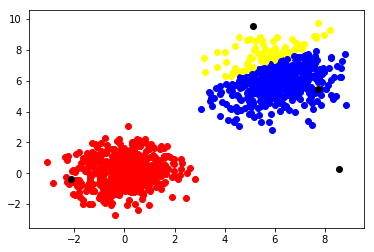

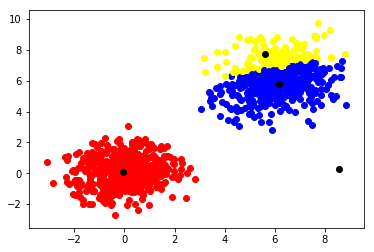

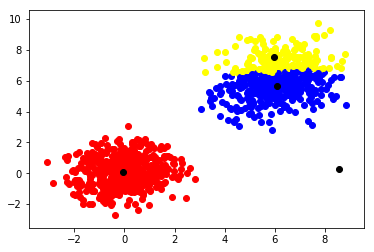

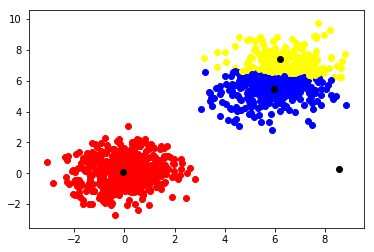

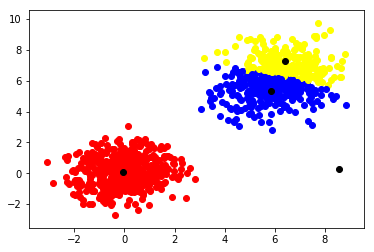

In [42]:
for i in range(num_iters):
    for j in range(data.shape[0]):
        # Step 1 - Adding points to Cluster 
        
        d=[]                                                           # Create a list for storing distance 
        for c_no in range(k):
            dist = Distance(data[j],clusters[c_no]['centroid'])        
            d.append(dist)
        converted_array = np.array(d)
        cluster_id = np.argmin(converted_array)
        clusters[cluster_id]['points'].append(data[j])
        plt.scatter(data[j,0],data[j,1],color=clusters[cluster_id]['color'])
    # Step 2 - Updating the cluster by saving old centroid to history and finding new centroid & saving to current centroid
    
    for c_no in range(k):
        plt.scatter(clusters[c_no]['centroid'][0],clusters[c_no]['centroid'][1],color='black')
        old_centroid = clusters[c_no]['centroid']
        clusters[c_no]['history'].append(old_centroid)
        
        if len(clusters[c_no]['points']) > 0:
            new_centroid = np.mean(np.array(clusters[c_no]['points']),axis=0)
            clusters[c_no]['centroid'] = new_centroid
        
        # Step 3 - Empty the list again for next iteration
        
        clusters[c_no]['points']=[]
    plt.show()